In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
data=pd.read_csv('/content/Walmart DataSet.csv')

In [3]:
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [4]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
store6=data[data['Store']==6]

In [7]:
store6

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
715      6  05-02-2010    1652635.10             0        40.43       2.572   
716      6  12-02-2010    1606283.86             1        40.57       2.548   
717      6  19-02-2010    1567138.07             0        43.58       2.514   
718      6  26-02-2010    1432953.21             0        47.10       2.561   
719      6  05-03-2010    1601348.82             0        49.63       2.625   
..     ...         ...           ...           ...          ...         ...   
853      6  28-09-2012    1369131.46             0        77.82       3.666   
854      6  05-10-2012    1518177.71             0        70.84       3.617   
855      6  12-10-2012    1459396.84             0        65.43       3.601   
856      6  19-10-2012    1436883.99             0        69.68       3.594   
857      6  26-10-2012    1431426.34             0        72.34       3.506   

            CPI  Unemployment  
715  212.622352         7.259  
716  212.770042         7.259  
717  212.816155         7.259  
718  212.845337         7.259  
719  212.874519         7.259  
..          ...           ...  
853  224.602971         5.668  
854  224.804222         5.329  
855  225.005473         5.329  
856  225.050101         5.329  
857  225.068625         5.329  

[143 rows x 8 columns]

In [8]:
store6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 715 to 857
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Date          143 non-null    object 
 2   Weekly_Sales  143 non-null    float64
 3   Holiday_Flag  143 non-null    int64  
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 10.1+ KB


In [9]:
store6['Date']=pd.to_datetime(store6['Date'],dayfirst=True)

/tmp/ipython-input-9-261658144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store6['Date']=pd.to_datetime(store6['Date'],dayfirst=True)


In [10]:
store6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 715 to 857
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


In [11]:
store6.index=store6['Date']

In [12]:
store6

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05      6 2010-02-05    1652635.10             0        40.43   
2010-02-12      6 2010-02-12    1606283.86             1        40.57   
2010-02-19      6 2010-02-19    1567138.07             0        43.58   
2010-02-26      6 2010-02-26    1432953.21             0        47.10   
2010-03-05      6 2010-03-05    1601348.82             0        49.63   
...           ...        ...           ...           ...          ...   
2012-09-28      6 2012-09-28    1369131.46             0        77.82   
2012-10-05      6 2012-10-05    1518177.71             0        70.84   
2012-10-12      6 2012-10-12    1459396.84             0        65.43   
2012-10-19      6 2012-10-19    1436883.99             0        69.68   
2012-10-26      6 2012-10-26    1431426.34             0        72.34   

            Fuel_Price         CPI  Unemployment  
Date                                              
2010-02-05       2.572  212.622352         7.259  
2010-02-12       2.548  212.770042         7.259  
2010-02-19       2.514  212.816155         7.259  
2010-02-26       2.561  212.845337         7.259  
2010-03-05       2.625  212.874519         7.259  
...                ...         ...           ...  
2012-09-28       3.666  224.602971         5.668  
2012-10-05       3.617  224.804222         5.329  
2012-10-12       3.601  225.005473         5.329  
2012-10-19       3.594  225.050101         5.329  
2012-10-26       3.506  225.068625         5.329  

[143 rows x 8 columns]

In [13]:
store6.drop(columns=['Store','CPI','Date','Holiday_Flag','Temperature','Fuel_Price','Unemployment'],inplace=True)

/tmp/ipython-input-13-1493924161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store6.drop(columns=['Store','CPI','Date','Holiday_Flag','Temperature','Fuel_Price','Unemployment'],inplace=True)


In [14]:
store6

Weekly_Sales
Date                    
2010-02-05    1652635.10
2010-02-12    1606283.86
2010-02-19    1567138.07
2010-02-26    1432953.21
2010-03-05    1601348.82
...                  ...
2012-09-28    1369131.46
2012-10-05    1518177.71
2012-10-12    1459396.84
2012-10-19    1436883.99
2012-10-26    1431426.34

[143 rows x 1 columns]

<Axes: xlabel='Date'>

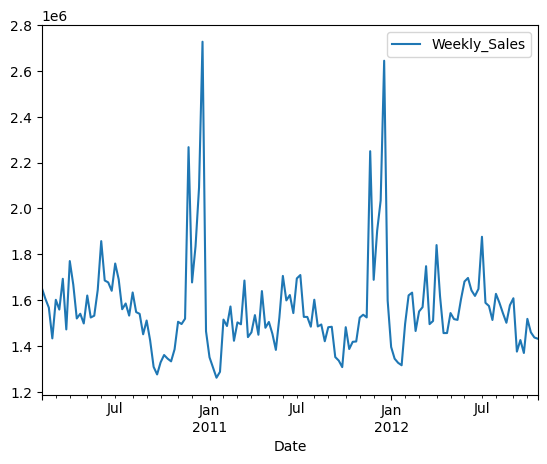

In [15]:
store6.plot()

In [16]:
result=adfuller(store6['Weekly_Sales'])

In [17]:
result

(-5.492502135779504,
 2.1594858682169703e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3474.9714643671264)

In [18]:
if result[1]<0.05:
  print('accept null hypothesis and data is stationary')
else:
  print('accept alternate hypothesis and data is not stationary')

accept null hypothesis and data is stationary


In [19]:
!pip install numpy==1.23.5 scipy==1.10.1

In [20]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.5 MB/s eta 0:00:00


In [21]:
from  pmdarima import auto_arima

In [22]:
auto=auto_arima(store6['Weekly_Sales'])
auto.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1940.564
Date:                Fri, 20 Jun 2025   AIC                           3887.129
Time:                        17:18:23   BIC                           3896.017
Sample:                    02-05-2010   HQIC                          3890.740
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.603e+05   7.59e+04     11.333      0.000    7.11e+05    1.01e+06
ar.L1          0.4501      0.040     11.274      0.000       0.372       0.528
sigma2      3.601e+10      0.958   3.76e+10      0.000     3.6e+10     3.6e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               531.16
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             2.02
Prob(H) (two-sided):                  0.20   Kurtosis:                        11.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+25. Standard errors may be unstable.
"""

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
train=store6.iloc[:131]
test=store6.iloc[131:]

In [25]:
model=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,12))
model_fit=model.fit()
store6['Predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-25-3092027246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store6['Predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)


<Axes: xlabel='Date'>

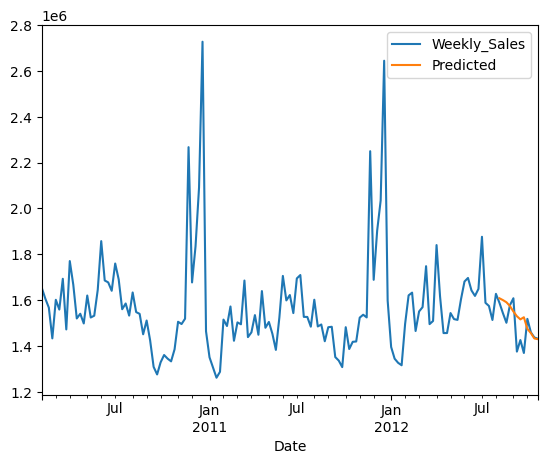

In [26]:
store6.plot()

In [27]:
forecast=model_fit.get_forecast(steps=16)
future_preds=forecast.predicted_mean

Text(0.5, 1.0, 'Forecast Graph of Store6')

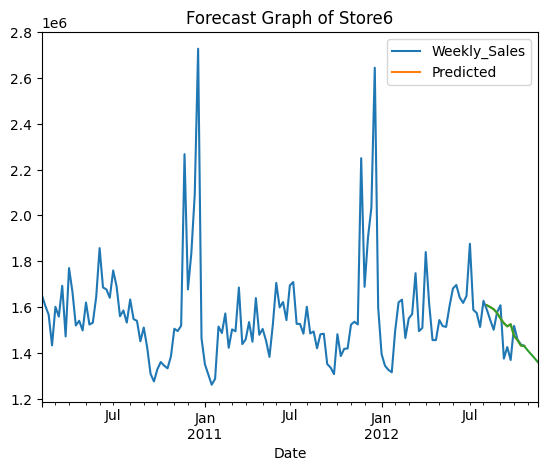

In [29]:
store6.plot()
future_preds.plot()
plt.title('Forecast Graph of Store6')

<Axes: >

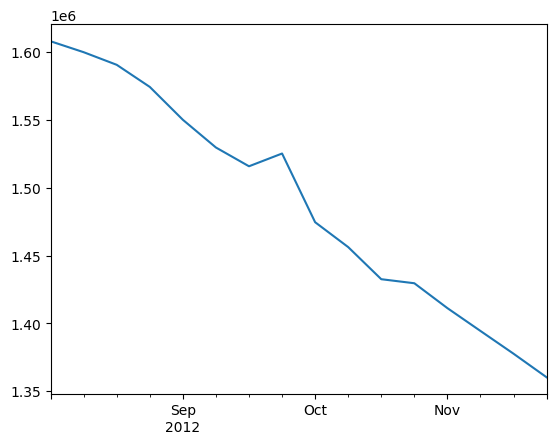

In [30]:
future_preds.plot()

In [31]:
store27=data[data['Store']==27]

In [32]:
store27.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 3718 to 3860
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Date          143 non-null    object 
 2   Weekly_Sales  143 non-null    float64
 3   Holiday_Flag  143 non-null    int64  
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 10.1+ KB


In [33]:
store27

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3718     27  05-02-2010    1874289.79             0        27.19       2.954   
3719     27  12-02-2010    1745362.72             1        29.81       2.940   
3720     27  19-02-2010    1945070.33             0        32.44       2.909   
3721     27  26-02-2010    1390934.27             0        36.00       2.910   
3722     27  05-03-2010    1313729.72             0        38.07       2.919   
...     ...         ...           ...           ...          ...         ...   
3856     27  28-09-2012    1540687.63             0        64.92       4.158   
3857     27  05-10-2012    1591816.88             0        64.50       4.151   
3858     27  12-10-2012    1660081.29             0        55.40       4.186   
3859     27  19-10-2012    1620374.24             0        56.53       4.153   
3860     27  26-10-2012    1703047.74             0        58.99       4.071   

             CPI  Unemployment  
3718  135.352461         8.237  
3719  135.411308         8.237  
3720  135.465778         8.237  
3721  135.519519         8.237  
3722  135.573260         8.237  
...          ...           ...  
3856  142.765750         8.239  
3857  142.851683         8.000  
3858  142.937617         8.000  
3859  142.863363         8.000  
3860  142.762411         8.000  

[143 rows x 8 columns]

In [34]:
store27['Date']=pd.to_datetime(store27['Date'],dayfirst=True)

/tmp/ipython-input-34-436728486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store27['Date']=pd.to_datetime(store27['Date'],dayfirst=True)


In [35]:
store27.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 3718 to 3860
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


In [36]:
store27.index=store27['Date']
store27

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05     27 2010-02-05    1874289.79             0        27.19   
2010-02-12     27 2010-02-12    1745362.72             1        29.81   
2010-02-19     27 2010-02-19    1945070.33             0        32.44   
2010-02-26     27 2010-02-26    1390934.27             0        36.00   
2010-03-05     27 2010-03-05    1313729.72             0        38.07   
...           ...        ...           ...           ...          ...   
2012-09-28     27 2012-09-28    1540687.63             0        64.92   
2012-10-05     27 2012-10-05    1591816.88             0        64.50   
2012-10-12     27 2012-10-12    1660081.29             0        55.40   
2012-10-19     27 2012-10-19    1620374.24             0        56.53   
2012-10-26     27 2012-10-26    1703047.74             0        58.99   

            Fuel_Price         CPI  Unemployment  
Date                                              
2010-02-05       2.954  135.352461         8.237  
2010-02-12       2.940  135.411308         8.237  
2010-02-19       2.909  135.465778         8.237  
2010-02-26       2.910  135.519519         8.237  
2010-03-05       2.919  135.573260         8.237  
...                ...         ...           ...  
2012-09-28       4.158  142.765750         8.239  
2012-10-05       4.151  142.851683         8.000  
2012-10-12       4.186  142.937617         8.000  
2012-10-19       4.153  142.863363         8.000  
2012-10-26       4.071  142.762411         8.000  

[143 rows x 8 columns]

In [37]:
store27.drop(columns=['Store','Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)

/tmp/ipython-input-37-958838173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store27.drop(columns=['Store','Date','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'],inplace=True)


In [38]:
store27

Weekly_Sales
Date                    
2010-02-05    1874289.79
2010-02-12    1745362.72
2010-02-19    1945070.33
2010-02-26    1390934.27
2010-03-05    1313729.72
...                  ...
2012-09-28    1540687.63
2012-10-05    1591816.88
2012-10-12    1660081.29
2012-10-19    1620374.24
2012-10-26    1703047.74

[143 rows x 1 columns]

<Axes: xlabel='Date'>

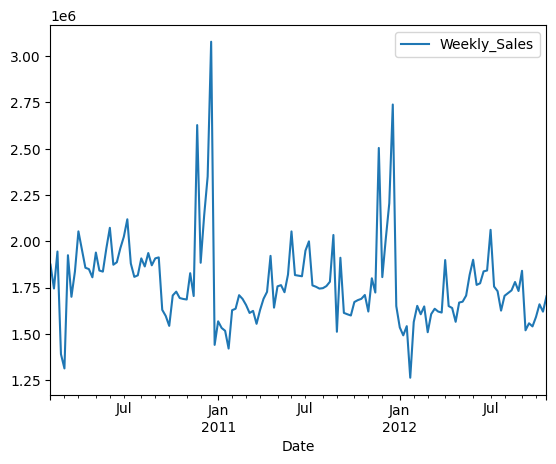

In [39]:
store27.plot()

In [40]:
result=adfuller(store27['Weekly_Sales'])
result


(-5.2537794000268185,
 6.821221055631735e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3506.0429505715765)

In [41]:
if result[1]<0.05:
  print('accept null hypothesis and data is stationary')
else:
  print('accept alternate hypothesis and data is not stationary')


accept null hypothesis and data is stationary


In [42]:
auto=auto_arima(store27['Weekly_Sales'])
auto.summary()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1961.754
Date:                Fri, 20 Jun 2025   AIC                           3931.509
Time:                        17:19:07   BIC                           3943.360
Sample:                    02-05-2010   HQIC                          3936.325
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.353e+05   1.26e+05      7.433      0.000    6.89e+05    1.18e+06
ar.L1          0.3036      0.047      6.420      0.000       0.211       0.396
ar.L2          0.1694      0.075      2.270      0.023       0.023       0.316
sigma2      4.875e+10      1.431   3.41e+10      0.000    4.88e+10    4.88e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               336.74
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.32
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.57e+25. Standard errors may be unstable.
"""

In [43]:
store27

Weekly_Sales
Date                    
2010-02-05    1874289.79
2010-02-12    1745362.72
2010-02-19    1945070.33
2010-02-26    1390934.27
2010-03-05    1313729.72
...                  ...
2012-09-28    1540687.63
2012-10-05    1591816.88
2012-10-12    1660081.29
2012-10-19    1620374.24
2012-10-26    1703047.74

[143 rows x 1 columns]

In [44]:
train=store27.iloc[:131]
test=store27.iloc[131:]


In [45]:
model=SARIMAX(train,order=(2,0,0),seasonal_order=(2,0,0,12))
model_fit=model.fit()
store27['Predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-45-3615782632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store27['Predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)


In [46]:
store27

Weekly_Sales     Predicted
Date                                  
2010-02-05    1874289.79           NaN
2010-02-12    1745362.72           NaN
2010-02-19    1945070.33           NaN
2010-02-26    1390934.27           NaN
2010-03-05    1313729.72           NaN
...                  ...           ...
2012-09-28    1540687.63  1.591093e+06
2012-10-05    1591816.88  1.600966e+06
2012-10-12    1660081.29  1.587700e+06
2012-10-19    1620374.24  1.595605e+06
2012-10-26    1703047.74  1.583114e+06

[143 rows x 2 columns]

<Axes: xlabel='Date'>

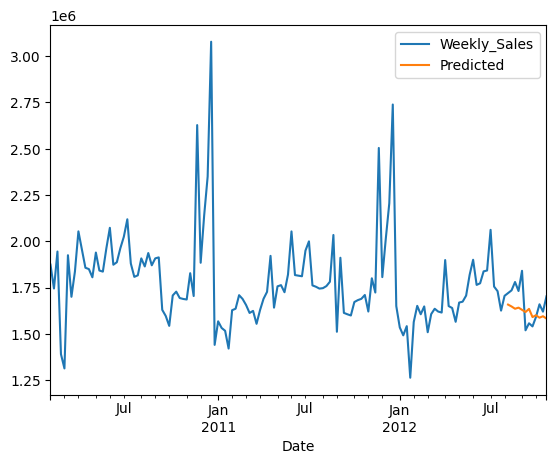

In [47]:
store27[['Weekly_Sales','Predicted']].plot()

In [48]:
forecast=model_fit.get_forecast(steps=16)
future_preds=forecast.predicted_mean

Text(0.5, 1.0, 'Forecast graph of Store27')

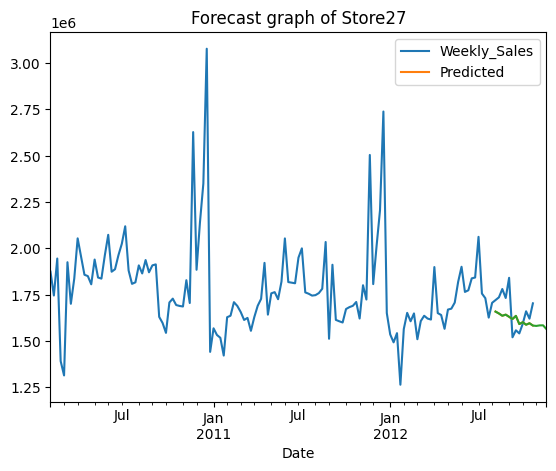

In [52]:
store27.plot()
future_preds.plot()
plt.title('Forecast graph of Store27')

<Axes: >

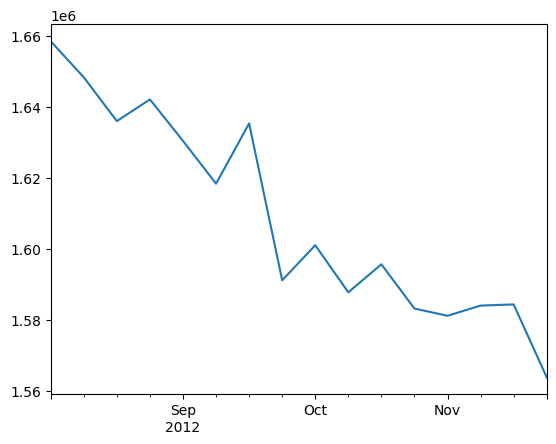

In [53]:
future_preds.plot()

In [54]:
store16=data[data['Store']==16]
store16

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2145     16  05-02-2010     477409.30             0        19.79       2.580   
2146     16  12-02-2010     472044.28             1        20.87       2.572   
2147     16  19-02-2010     469868.70             0        21.13       2.550   
2148     16  26-02-2010     443242.17             0        18.12       2.586   
2149     16  05-03-2010     444181.85             0        27.92       2.620   
...     ...         ...           ...           ...          ...         ...   
2283     16  28-09-2012     469607.73             0        51.40       3.789   
2284     16  05-10-2012     471281.68             0        50.46       3.779   
2285     16  12-10-2012     491817.19             0        43.26       3.760   
2286     16  19-10-2012     577198.97             0        40.59       3.750   
2287     16  26-10-2012     475770.14             0        40.99       3.686   

             CPI  Unemployment  
2145  189.381697         7.039  
2146  189.464272         7.039  
2147  189.534100         7.039  
2148  189.601802         7.039  
2149  189.669505         7.039  
...          ...           ...  
2283  198.590328         6.061  
2284  198.822132         5.847  
2285  199.053937         5.847  
2286  199.148196         5.847  
2287  199.219532         5.847  

[143 rows x 8 columns]

In [55]:
store16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 2145 to 2287
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Date          143 non-null    object 
 2   Weekly_Sales  143 non-null    float64
 3   Holiday_Flag  143 non-null    int64  
 4   Temperature   143 non-null    float64
 5   Fuel_Price    143 non-null    float64
 6   CPI           143 non-null    float64
 7   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 10.1+ KB


In [56]:
store16['Date']=pd.to_datetime(store16['Date'],dayfirst=True)
store16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 2145 to 2287
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


/tmp/ipython-input-56-2900343884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store16['Date']=pd.to_datetime(store16['Date'],dayfirst=True)


In [57]:
store16.index=store16['Date']
store16

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05     16 2010-02-05     477409.30             0        19.79   
2010-02-12     16 2010-02-12     472044.28             1        20.87   
2010-02-19     16 2010-02-19     469868.70             0        21.13   
2010-02-26     16 2010-02-26     443242.17             0        18.12   
2010-03-05     16 2010-03-05     444181.85             0        27.92   
...           ...        ...           ...           ...          ...   
2012-09-28     16 2012-09-28     469607.73             0        51.40   
2012-10-05     16 2012-10-05     471281.68             0        50.46   
2012-10-12     16 2012-10-12     491817.19             0        43.26   
2012-10-19     16 2012-10-19     577198.97             0        40.59   
2012-10-26     16 2012-10-26     475770.14             0        40.99   

            Fuel_Price         CPI  Unemployment  
Date                                              
2010-02-05       2.580  189.381697         7.039  
2010-02-12       2.572  189.464272         7.039  
2010-02-19       2.550  189.534100         7.039  
2010-02-26       2.586  189.601802         7.039  
2010-03-05       2.620  189.669505         7.039  
...                ...         ...           ...  
2012-09-28       3.789  198.590328         6.061  
2012-10-05       3.779  198.822132         5.847  
2012-10-12       3.760  199.053937         5.847  
2012-10-19       3.750  199.148196         5.847  
2012-10-26       3.686  199.219532         5.847  

[143 rows x 8 columns]

In [58]:
store16.drop(columns=['Date','Store','CPI','Unemployment','Temperature','Holiday_Flag','Fuel_Price'],inplace=True)
store16

/tmp/ipython-input-58-3763578254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store16.drop(columns=['Date','Store','CPI','Unemployment','Temperature','Holiday_Flag','Fuel_Price'],inplace=True)


Weekly_Sales
Date                    
2010-02-05     477409.30
2010-02-12     472044.28
2010-02-19     469868.70
2010-02-26     443242.17
2010-03-05     444181.85
...                  ...
2012-09-28     469607.73
2012-10-05     471281.68
2012-10-12     491817.19
2012-10-19     577198.97
2012-10-26     475770.14

[143 rows x 1 columns]

<Axes: xlabel='Date'>

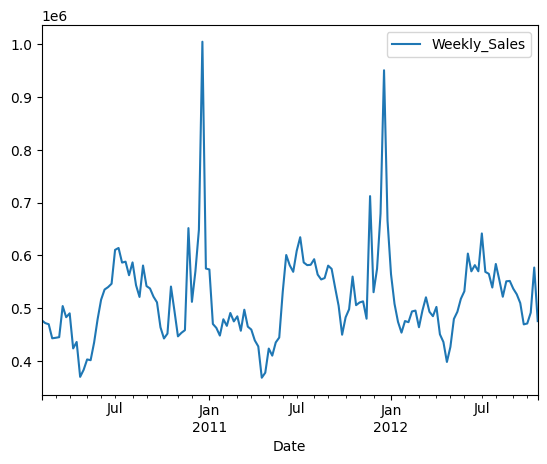

In [59]:
store16.plot()

In [60]:
resut=adfuller(store16['Weekly_Sales'])
result
if result[1]<0.05:
  print('accpet null hypothesis and data is stationary')
else:
  print('accpet alternate hypothesis and data is not stationary')

accpet null hypothesis and data is stationary


In [61]:
auto=auto_arima(store16['Weekly_Sales'])
auto.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1792.352
Date:                Fri, 20 Jun 2025   AIC                           3592.703
Time:                        17:20:15   BIC                           3604.555
Sample:                    02-05-2010   HQIC                          3597.519
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.772e+05   4.17e+04      4.250      0.000    9.55e+04    2.59e+05
ar.L1          0.5336      0.052     10.205      0.000       0.431       0.636
ar.L2          0.1244      0.100      1.246      0.213      -0.071       0.320
sigma2      4.549e+09      0.680   6.69e+09      0.000    4.55e+09    4.55e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1274.84
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             2.59
Prob(H) (two-sided):                  0.16   Kurtosis:                        16.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.13e+25. Standard errors may be unstable.
"""

In [62]:
store16

Weekly_Sales
Date                    
2010-02-05     477409.30
2010-02-12     472044.28
2010-02-19     469868.70
2010-02-26     443242.17
2010-03-05     444181.85
...                  ...
2012-09-28     469607.73
2012-10-05     471281.68
2012-10-12     491817.19
2012-10-19     577198.97
2012-10-26     475770.14

[143 rows x 1 columns]

In [63]:
train=store16.iloc[:131]
test=store16.iloc[131:]
model=SARIMAX(train,order=(2,0,0),seasonal_order=(2,0,0,12))
model_fit=model.fit()
store16['Predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/tmp/ipython-input-63-1685868021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store16['Predicted']=m

In [64]:
store16

Weekly_Sales      Predicted
Date                                   
2010-02-05     477409.30            NaN
2010-02-12     472044.28            NaN
2010-02-19     469868.70            NaN
2010-02-26     443242.17            NaN
2010-03-05     444181.85            NaN
...                  ...            ...
2012-09-28     469607.73  531956.357214
2012-10-05     471281.68  524703.395970
2012-10-12     491817.19  512735.260717
2012-10-19     577198.97  514915.793787
2012-10-26     475770.14  522574.344683

[143 rows x 2 columns]

<Axes: xlabel='Date'>

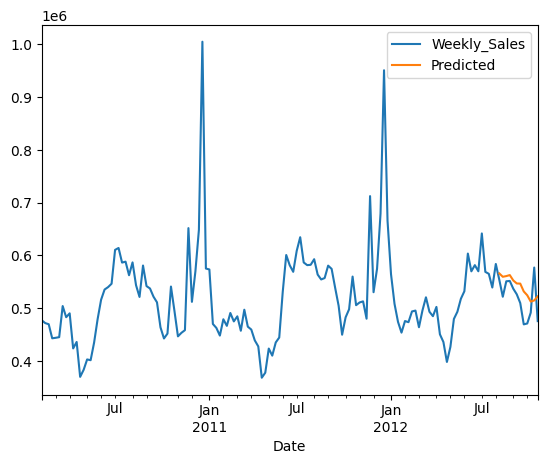

In [65]:
store16.plot()

In [66]:
forecast=model_fit.get_forecast(steps=16)
future_preds=forecast.predicted_mean

Text(0.5, 1.0, 'Forecast Graph of Store16')

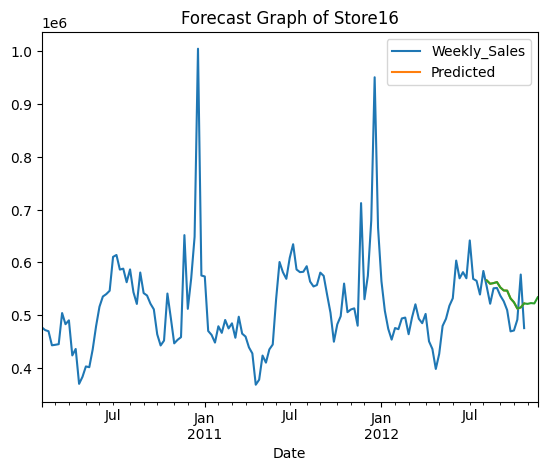

In [69]:
store16.plot()
future_preds.plot()
plt.title('Forecast Graph of Store16')

<Axes: >

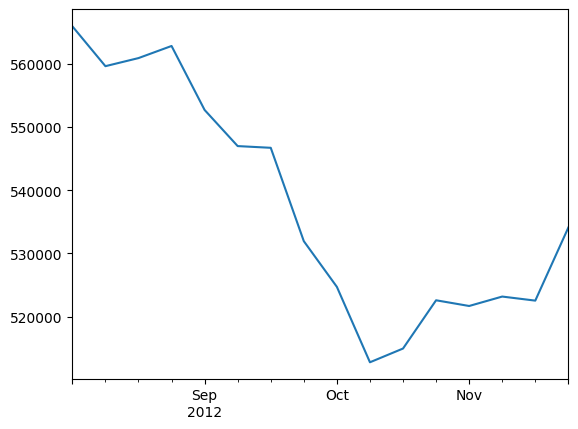

In [68]:
future_preds.plot()